In [130]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import sys
from IPython.display import clear_output
import pandas as pd
import random
from utils import get_chars, get_words, save_img, resize, normalize_images
from highlight import HighlightWords
from keras.models import load_model

In [131]:
def plot_img(img, figsize=(20, 20)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')

In [132]:
def process_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY_INV)[1]
    return img

In [133]:
def read_imgs(path, process=True):
    filenames = os.listdir(path)
    if process:
        imgs = [process_img(path + name) for name in filenames if not 'ipynb' in name]
    else:
        imgs = [cv2.imread(path + name) for name in filenames if not 'ipynb' in name]
    return imgs

In [134]:
def read_one_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img, 160, 255, cv2.THRESH_BINARY_INV)[1]
    
    return img

In [135]:
def get_accuracy(model, imgs, words):
    correct = 0
    wrong = 0
    imgs = []
    for i, example in enumerate(words):
        for word, (x, y, w, h) in enumerate(example):
            temp_img = imgs[i][y:y+h, x:x+w]
#             print(temp_img)
            temp_img = resize(imgs[i], (x, y, w, h))
            temp_img = normalize_images(temp_img)
            
            if predicted == word:
                correct += 1
            else:
                wrong += 1
                
    accuracy = correct / (correct+wrong)
    return accuracy

In [136]:
class Dataset:
    def __init__(self):
        self._path = 'course_project/train/{}/{}.jpg'
        self._font_names = [ name for name in os.listdir('course_project/train/') if '.' not in name]
        self._indxs = np.zeros((49, 88))
        self._indxs[:] = np.arange(88)
        self._last_batch = None
        
    def gen_batches(self, seed=None):
        np.random.seed(seed)
        for row in range(49):
            self._indxs[row] = np.random.randint(49, size=88)
        self._last_batch = 0
    
    def get_batch(self):
        X = np.zeros((88, 28, 28, 1))
        y = np.zeros((88, 62))

        indx = 0
        for j, val in enumerate(self._indxs[self._last_batch+1]):
            path = self._path.format(self._font_names[int(val)], alphabet[j])
            X[indx] = read_one_img(path).reshape((28, 28, 1))
            y[indx][temp[j]] = 1
                
            indx += 1
        self._last_batch += 1
        
        indxs = np.random.permutation(88)
        
        return X[indxs], y[indxs]

In [137]:
def get_words1(img):
    maxs = np.max(img, axis=1) # Take 
    indxs_y = np.where(maxs[:-1] != maxs[1:])[0]
    cordinates = [] # (x, y, w, h)
    for indx_y in range(0, len(indxs_y)-1, 2):
        row = img[indxs_y[indx_y]:indxs_y[indx_y+1]]
#         print(indxs_y[indx_y+1] - indxs_y[indx_y])
#         kernel_x = (indxs_y[indx_y+1] - indxs_y[indx_y]) // 3
#         kernel_x += int(np.sqrt(kernel_x))
#         print(kernel_x)
#         kernel = np.ones((2, min(15, kernel_x)), np.uint8)
#         dilated = cv2.dilate(row, kernel, iterations=1)
        maxs1 = np.max(row, axis=0)
        indxs_x = np.where(maxs1[:-1] != maxs1[1:])[0]
        for indx_x in range(0, len(indxs_x)-1, 2):
            cordinates.append((
                indxs_x[indx_x],
                indxs_y[indx_y],
                indxs_x[indx_x+1] - indxs_x[indx_x],
                indxs_y[indx_y+1] - indxs_y[indx_y]
            ))
            
    return cordinates

In [138]:
path = 'course_project/test/x_test/'
filenames = os.listdir(path)
imgs = read_imgs(path)
originals = read_imgs(path, process=False)

In [128]:
%%time
words = []
# chars = []
for img in imgs:
    temp_words = get_words1(img)
#     chars.append(get_chars(img, temp_words))
    words.append(temp_words)

CPU times: user 83.3 ms, sys: 3.01 ms, total: 86.3 ms
Wall time: 85.9 ms


In [129]:
path_to_save = 'course_project/tested/'
for i, item in enumerate(words):
    temp_img = originals[i].copy()
    for (x, y, w, h) in item:
        cv2.rectangle(temp_img, (x, y), (x+w, y+h), (0, 255, 0))
        save_img(path_to_save, temp_img, str(i)+'.jpg')

23
3
24
4
23
3
24
4
23
3
24
4
24
4
23
3
23
3
23
3
23
3
23
3
24
4
23
3
24
4
24
4
24
4
23
3
19
19


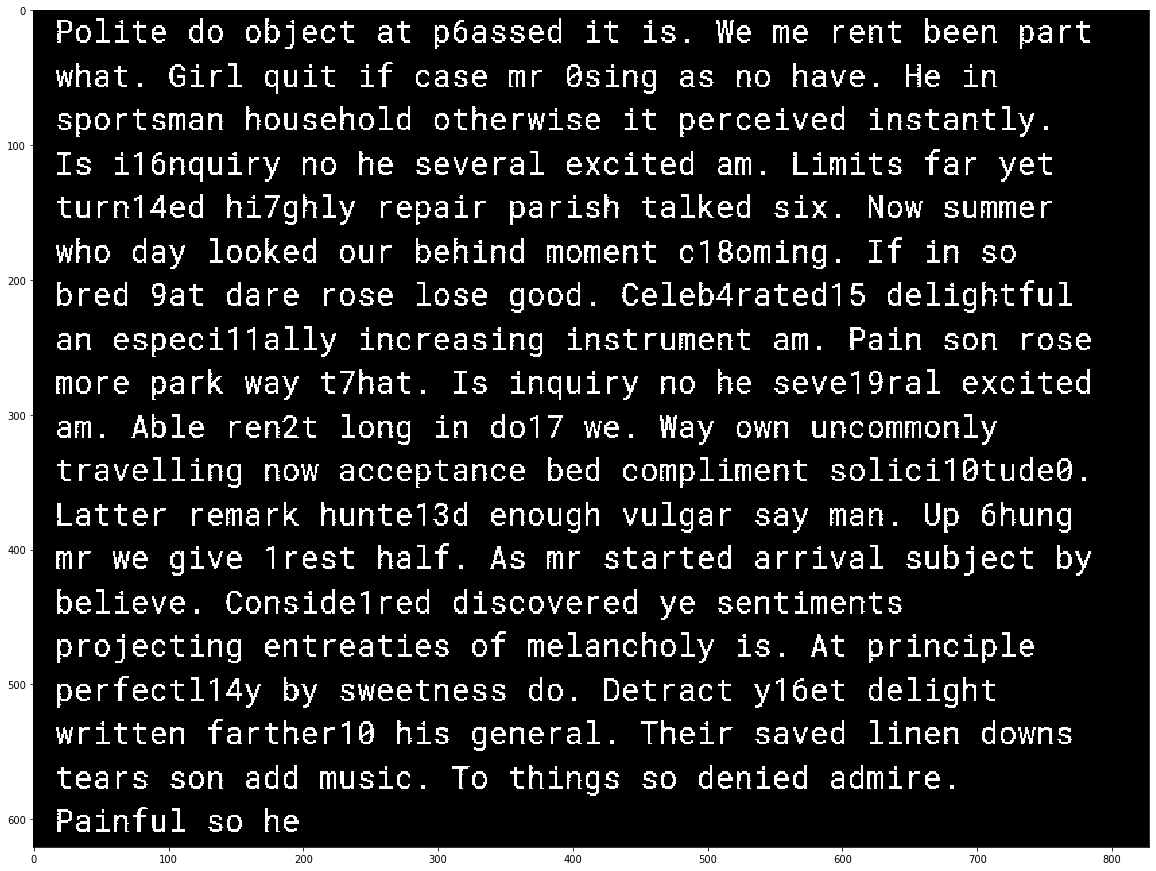

In [78]:
img = read_one_img('course_project/test/x_test/4.jpg')
words = get_words1(img)
plot_img(img)

In [64]:
n = 23
# word = 23
word = 28
x, y, w, h = words[n][word]
temp = resize(imgs[n], (x, y, w, h))
temp = normalize_images(temp)
plt.imshow(np.reshape(temp, (28, 28)), cmap='gray')
temp = np.reshape(temp, (1, 28, 28, 1))
print('Predicted: {}'.format(alphabet2[np.argmax(model.predict(temp))]))

NameError: name 'normalize_images' is not defined

Predicted: 0


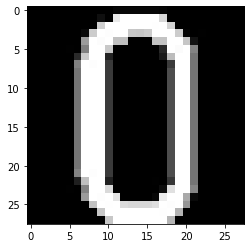

In [18]:
n = 23
# word = 23
word = 78
x, y, w, h = words[n][word]
temp = resize(imgs[n], (x, y, w, h))
temp = normalize_images(temp)
plt.imshow(np.reshape(temp, (28, 28)), cmap='gray')
temp = np.reshape(temp, (1, 28, 28, 1))
print('Predicted: {}'.format(alphabet2[np.argmax(model.predict(temp))]))